In [8]:
import cv2
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
directory = 'wiki_labeled/wiki_labeled/'

### Question 1

In [12]:
from scipy.io import loadmat
metaData = loadmat("wiki_labeled.mat",squeeze_me=True, struct_as_record=True)

age_data = list(metaData['wiki_labeled']['age'].item(0))
Identity_data = list(metaData['wiki_labeled']['ID'].item(0))
fullpath_data = list(metaData['wiki_labeled']['full_path'].item(0))
face_score = list(metaData['wiki_labeled']['face_score'].item(0))
second_face_score = list(metaData['wiki_labeled']['second_face_score'].item(0))

print(len(age_data))

data_dic = {'ID':Identity_data, 'Full_path':fullpath_data, 'face_score':face_score, 'second_face_score':second_face_score, 'Age':age_data}
df_data = pd.DataFrame(data_dic)
df_data = df_data[df_data['face_score'] != -np.inf]
df_data.info()
df_data.head()

60327
<class 'pandas.core.frame.DataFrame'>
Int64Index: 42866 entries, 0 to 60326
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 42866 non-null  int16  
 1   Full_path          42866 non-null  object 
 2   face_score         42866 non-null  float64
 3   second_face_score  3963 non-null   float64
 4   Age                42866 non-null  float64
dtypes: float64(3), int16(1), object(1)
memory usage: 1.7+ MB


,ID,Full_path,face_score,second_face_score,Age
0,2002,17/10000217_1981-05-05_2009.png,4.300962,NaN,27.746119
1,2003,12/100012_1948-07-03_2008.png,4.329329,NaN,59.582192
3,2005,16/10002116_1971-05-31_2012.png,3.408442,NaN,40.672146
4,2006,02/10002702_1960-11-09_2012.png,4.748056,NaN,51.224201
5,2007,41/10003541_1937-09-27_1971.png,4.184828,NaN,33.347032


### Question 2

In [14]:
#creating a training and test dataset
X = df_data.loc[:,['ID','Full_path']]
Y = df_data.loc[:,'Age']

X_train_indexes, X_test_indexes, y_train, y_test = train_test_split(X, Y, test_size=0.20)
print(X_train_indexes.head())

          ID                        Full_path
8811   10813  78/24168878_1986-06-15_2013.png
52752 -10782  38/36892038_1993-03-07_2013.png
29007  31009  23/37467623_1986-06-06_2008.png
5228    7230  69/28047269_1989-05-08_2014.png
2644    4646  39/14008239_1972-04-18_2009.png


### Question 3

In [22]:
def PCA(image):
    
    #reshaping I to T
    T = image.reshape((image.shape[0]*image.shape[1], 1))
    
    #computing average face vector
    mean_image = np.mean(T)
    
    #original - mean
    meancentered_image = T - mean_image
    
    return meancentered_image

In [24]:
#train indexes iteration
list_A = []
for i in X_train_indexes['Full_path'].unique():
    
    path = directory+i
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    meancentered_image = PCA(image)
    meancentered_imageT = meancentered_image.T
    meancentered_imageT= meancentered_imageT[0]
    
    list_A.append(meancentered_imageT)

In [25]:
A = np.array(list_A)
A.shape

(34292, 10000)

In [26]:
#test indexes iteration
list_A_test = []
for i in X_test_indexes['Full_path'].unique():
    
    path = directory+i
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    meancentered_image = PCA(image)
    meancentered_imageT = meancentered_image.T
    meancentered_imageT= meancentered_imageT[0]
    
    list_A_test.append(meancentered_imageT)

In [28]:
A_test = np.array(list_A_test)
A_test.shape

(8574, 10000)

In [29]:
#covariance matrix for A
CovA = np.cov(A.T)
CovA.shape

(10000, 10000)

In [30]:
EigVal,EigVec = np.linalg.eig(CovA)

In [31]:
indexes = EigVal.argsort()[::-1]
print(indexes)
print(EigVal[indexes[0]])

[   0    1    2 ... 5969 5968  566]
5051417.79168703


### Question 4

In [32]:
total = sum(EigVal)
var_exp = [(i / total)*100 for i in sorted(EigVal, reverse=True)]
var_exp

[15.661746198722707,
 9.362762255580767,
 8.585916822662815,
 4.935453332861677,
 3.2057342622531926,
 2.9578350879188404,
 2.726859690660202,
 2.3496835254095214,
 1.798443440321947,
 1.7418293767343667,
 1.569610982380529,
 1.3332994323271283,
 1.1707554898518058,
 1.0725779826018014,
 0.9766774287894239,
 0.9164502727948193,
 0.8478335865393004,
 0.7660823144822799,
 0.7521868268918294,
 0.6909831262045413,
 0.6743289622299143,
 0.5950368686448784,
 0.5906120707392438,
 0.5723779202335799,
 0.506255036046201,
 0.4853612773704851,
 0.45948399981769106,
 0.4420345259133435,
 0.43575715484975286,
 0.4270826493127754,
 0.42346642865202677,
 0.3898495411204343,
 0.38539158661358613,
 0.3491909820771695,
 0.3412408594886602,
 0.33359228375600747,
 0.32716014458449116,
 0.3159721692113999,
 0.3053161419294458,
 0.2935124517037037,
 0.2917432024213641,
 0.28480712681799314,
 0.277326206893488,
 0.26505885268567503,
 0.2590707881172182,
 0.25225311677061363,
 0.2477114487606914,
 0.243150017

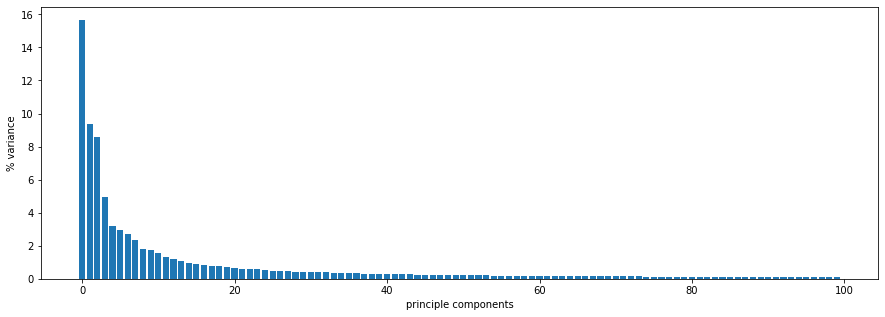

In [33]:
plt.figure(figsize=(15, 5))
plt.bar(np.arange(100),var_exp[:100])
plt.xlabel('principle components')
plt.ylabel('% variance')
plt.show()

#### The first 100 principle components  explains 81.72% of variance 

### Question 5 

Show the top 20 ghosts (i.e., eigenfaces) in a 10x10 grid.

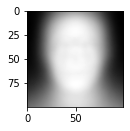

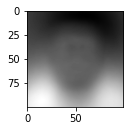

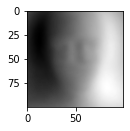

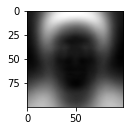

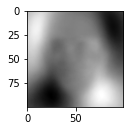

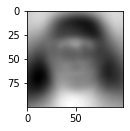

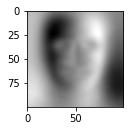

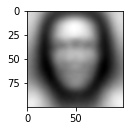

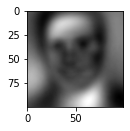

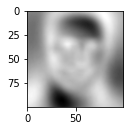

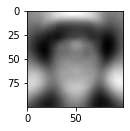

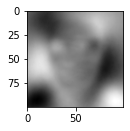

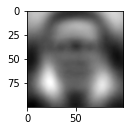

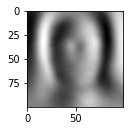

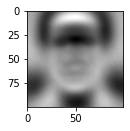

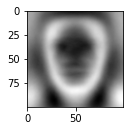

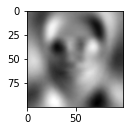

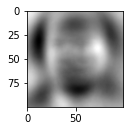

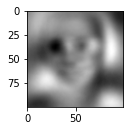

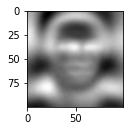

In [35]:
for i in range(0,20):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(4,5,i+1)
    ax.imshow(EigVec[:,i].reshape(100,100), cmap='gray')

### Question 6

In [38]:
k = 100
indexes1 = indexes[:k] 
print(indexes1.shape)

#Projection matrix
P = EigVec[:,indexes1]

X_train_new = A.dot(P)
print(X_train_new.shape)

X_test_new = A_test.dot(P)
print(X_test_new.shape)

(100,)
(34292, 100)
(8574, 100)


In [39]:
y_train1 = [int(i) for i in y_train.to_list()]
y_test1 = [int(i) for i in y_test.to_list()]

### Question 7

Here we have considered the number of epochs as 10 after trying out many values for number of epochs from 5 to 20.

And learning rate is taken as 'optimal' since it uses the formula eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou.

In [40]:
from sklearn import datasets, linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error, r2_score

model = SGDClassifier(loss="hinge", penalty="l2" , learning_rate='optimal', max_iter=10, tol=1e-3)
model.fit(X_train_new, y_train1)

C:\Users\VijayasimhaReddy B\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(max_iter=10)

### Question 8 

In [41]:
y_pred = model.predict(X_test_new)

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def RMSE(y_actual, y_pred):
    return round(sqrt(mean_squared_error(y_actual, y_pred)),2)

RMSE(y_test1, y_pred)

41.49

### Question 9 
main_test - submission.csv

In [44]:
from scipy.io import loadmat
metaData1 = loadmat("wiki_judgeX.mat",squeeze_me=True, struct_as_record=True)
print(metaData1)

ID_list = list(metaData1['wiki_judgeX']['ID'].item(0))
fullpath_list = list(metaData1['wiki_judgeX']['full_path'].item(0))

df_test_dic = {'ID':ID_list, 'Full_path':fullpath_list}
df_test_label = pd.DataFrame(df_test_dic)
df_test_label.info()
df_test_label.head()

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Feb 23 12:09:47 2019', '__version__': '1.0', '__globals__': [], 'wiki_judgeX': array((array(['1.png', '2.png', '3.png', ..., '1999.png', '2000.png', '2001.png'],
      dtype=object), array([1., 1., 1., ..., 1., 1., 1.]), array([2.6456395 ,       -inf, 5.47180121, ..., 3.24572625, 1.77799863,
       4.35951262]), array([1.94924791,        nan,        nan, ...,        nan,        nan,
              nan]), array([   1,    2,    3, ..., 1999, 2000, 2001], dtype=uint16)),
      dtype=[('full_path', 'O'), ('gender', 'O'), ('face_score', 'O'), ('second_face_score', 'O'), ('ID', 'O')])}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         2001 non-null   int16 
 1   Full_path  2001 non-null   object
dtypes: int16(1), object(1)
memory usage: 19.7+ KB


,ID,Full_path
0,1,1.png
1,2,2.png
2,3,3.png
3,4,4.png
4,5,5.png


In [45]:
#iterating over each image in the train indexes
directory1 = 'wiki_judge_images/wiki_judge_images/'

cnt = 0
A_test_list1 = []
for i in df_test_label['Full_path'].unique():
    print(cnt)
    
    img_path = directory1+i
    #print(img_path)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    #finding mean_centered_img by calling the PCA function
    mean_centered_img = PCA(img)
    mean_centered_img_T = mean_centered_img.T
    mean_centered_img_T= mean_centered_img_T[0]
    
    #A_list - combining all images into a single matrix A
    A_test_list1.append(mean_centered_img_T)
    cnt = cnt+1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [46]:
A_test1 = np.array(A_test_list1)
A_test1.shape

(2001, 10000)

In [47]:
New_X_test1 = A_test1.dot(P)
New_X_test1.shape

(2001, 100)

In [48]:
y_pred1 = model.predict(New_X_test1)

In [49]:
print(y_pred1)

[37 61 38 ... 37  3 98]


In [50]:
submission = {'ID':ID_list, 'age':y_pred1}
submission_df = pd.DataFrame(submission)
submission_df.info()
submission_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      2001 non-null   int16
 1   age     2001 non-null   int32
dtypes: int16(1), int32(1)
memory usage: 11.8 KB


,ID,age
0,1,37
1,2,61
2,3,38
3,4,25
4,5,94


In [51]:
submission_df.to_csv('submission_final.csv')

### Question 10

Repeat steps 2-8 four more times, and report average RMSE and standard deviation of the 
RMSE. Please make sure in step 2 you are actually randomly shuffling the dataset before 
splitting it every time. 

These iterations are run manually and results are noted manually

In [53]:
RMSE = [49.25, 45.54, 48.12, 41.49]

mean = np.mean(np.array(RMSE))
std = np.std(np.array(RMSE))

print('Average RMSE : ',round(mean,2))
print('Standard Deviation RMSE : ',round(std,2))

Average RMSE :  46.1
Standard Deviation RMSE :  2.98


### Question 11

Draw a plot (K vs RMSE) after experimenting with steps 2-8 by varying values of K. The 
maximum value K can take is 100x100 = 10000, so please draw the plot for the K values from 
the set {2, 10, 20, 40, 50, 60, 80, 100, 200}.

In [89]:
def RMSE(y_actual, y_predicted):
    return round(sqrt(mean_squared_error(y_actual, y_predicted)),2)

In [95]:
k_list = [2, 10, 20, 40, 50, 60, 80, 100, 200]
rmse_k_list = []

for k1 in k_list:
    print(k1)
    order2 = order[:k1] 
    print(order2.shape)

    #Projection matrix
    P1 = EigVec[:,order2]
    print(P1.shape)

    X_train_new1 = A.dot(P1)
    print(X_train_new1.shape)
    
    New_X_test1 = A_test.dot(P1)
    print(New_X_test1.shape)
    
    
    model = SGDClassifier(loss="hinge", penalty="l2" ,max_iter=10, tol=1e-3, learning_rate='optimal')
    model.fit(X_train_new1, y_train1)
    
    y_pred2 = model.predict(New_X_test1)
    
    rmse_k_list.append(RMSE(y_test1, y_pred2))

2
(2,)
(10000, 2)
(34292, 2)
(8574, 2)


C:\Users\VijayasimhaReddy B\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


10
(10,)
(10000, 10)
(34292, 10)
(8574, 10)


C:\Users\VijayasimhaReddy B\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


20
(20,)
(10000, 20)
(34292, 20)
(8574, 20)


C:\Users\VijayasimhaReddy B\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


40
(40,)
(10000, 40)
(34292, 40)
(8574, 40)


C:\Users\VijayasimhaReddy B\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


50
(50,)
(10000, 50)
(34292, 50)
(8574, 50)


C:\Users\VijayasimhaReddy B\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


60
(60,)
(10000, 60)
(34292, 60)
(8574, 60)


C:\Users\VijayasimhaReddy B\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


80
(80,)
(10000, 80)
(34292, 80)
(8574, 80)


C:\Users\VijayasimhaReddy B\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


100
(100,)
(10000, 100)
(34292, 100)
(8574, 100)


C:\Users\VijayasimhaReddy B\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


200
(200,)
(10000, 200)
(34292, 200)
(8574, 200)


C:\Users\VijayasimhaReddy B\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [96]:
print(rmse_k_list)

[27.21, 104.58, 60.25, 42.28, 75.93, 46.07, 57.66, 72.7, 49.65]


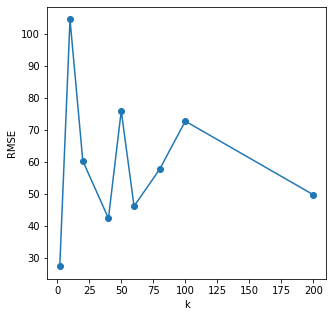

In [105]:
plt.figure(figsize=(5, 5))
plt.plot(k_list, rmse_k_list, marker='o')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()